Make sure you fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE`, as well as your name below:

In [1]:
NAME = "Jun Park"

---

# Lab 2: Clustering ##

**Please read the following instructions very carefully**

## About the Dataset
The dataset for this lab has been created from some custom features from Lab 1. The columns are named as q1, q2....etc. A description of the features can be found at this link: https://docs.google.com/spreadsheets/d/18wwyjGku2HYfgDX9Vez64lGHz31E_PfbpmAdfb7ly6M/edit?usp=sharing

## Working on the assignment / FAQs
- **Always use the seed/random_state as *42* wherever applicable** (This is to ensure repeatability in answers, across students and coding environments) 
- Questions can be either autograded and manually graded.
- The type of question and the points they carry are indicated in each question cell
- An autograded question has 3 cells
     - **Question cell** : Read only cell containing the question
     - **Code Cell** : This is where you write the code
     - **Grading cell** : This is where the grading occurs, and **you are required not to edit this cell**
- Manually graded questions only have the question and code cells.
- To avoid any ambiguity, each question also specifies what *value* the function must return. Note that these are dummy values and not the answers
- If an autograded question has multiple answers (due to differences in handling NaNs, zeros etc.), all answers will be considered.
- Most assignments have bonus questions for extra credit, do try them out! 
- You can delete the `raise NotImplementedError()` for all manually graded questions.
- **Submitting the assignment** : Download the '.ipynb' file from Colab and upload it to canvas. Do not delete any outputs from cells before submitting.
- That's about it. Happy coding! 

In [2]:
import pandas as pd
import collections
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.preprocessing import normalize

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use('ggplot')

#DOWNLOADING DATASET
!wget -nc http://askoski.berkeley.edu/~zp/yelp_reviewers.csv 
# !unzip -u yelp_reviewers.zip
print('Dataset Downloaded: yelp_reviewers.csv') 
df = pd.read_csv('yelp_reviewers.csv', delimiter= ',')
df = df.sample(frac=0.3, random_state=42)
print(df.dropna().describe())

print('....SETUP COMPLETE....')

--2021-09-08 16:10:33--  http://askoski.berkeley.edu/~zp/yelp_reviewers.csv
Resolving askoski.berkeley.edu (askoski.berkeley.edu)... 169.229.192.179
Connecting to askoski.berkeley.edu (askoski.berkeley.edu)|169.229.192.179|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35809479 (34M) [text/csv]
Saving to: ‘yelp_reviewers.csv’

yelp_reviewers.csv  100%[===================>]  34.15M  24.9MB/s    in 1.4s    

2021-09-08 16:10:34 (24.9 MB/s) - ‘yelp_reviewers.csv’ saved [35809479/35809479]

Dataset Downloaded: yelp_reviewers.csv
                q3           q4  ...        q16ab        q16ac
count  7177.000000  7177.000000  ...  7177.000000  7177.000000
mean      6.838651     5.281455  ...     1.127751     3.649254
std       7.597977    16.208703  ...     4.652206     0.977100
min       1.000000     1.000000  ...     0.000000     1.000000
25%       3.000000     1.000000  ...     0.000000     3.200000
50%       5.000000     2.000000  ...     0.500000     3.777778
75

In [3]:
df.head().T

,129451,116706,144394,24699,47453
user_id,kIWQXgjmVdgEs9BOgr8G5A,fXU_-5DBmNlGhI8fbX-2vQ,prF_lbKywPnZhNqvJOOaDw,8GHUeOm807bI5Qh4X3CHBA,Gd_IGX3BmRYbPD84ovLEoA
q3,1,1,1,1,8
q4,0,0,0,0,2
q5,0,0,0,0,1
q6,0,0,0,0,8
q7,0,0,0,0,2.08
q8,NaN,NaN,NaN,NaN,0.69
q9,NaN,NaN,NaN,NaN,0
q10,NaN,NaN,NaN,NaN,2.08
q11,NaN,NaN,NaN,NaN,18.18


---

### Question 1 `(1 point)`
What is the best choice of k according to the silhouette metric for clustering q4-q6? Only consider 2 <= k <= 8. 


**NOTE**: For features with high variance, empty clusters can occur. There are several ways of dealing with empty clusters. A common approach is to drop empty clusters, the prefered approach for this Lab is to treat the empty cluster as a “singleton” leaving it empty with a single point placeholder.


In [60]:
#Make sure you return the answer value in this function
#The return value must be an integer
def q1(df):
    
    q1_df = df[['q4','q5','q6']].dropna()
    q1_df_start = df[['q4','q5','q6']].dropna()
    kmeans_start = KMeans(n_clusters = 2, random_state = 42)
    kmeans_start.fit(q1_df_start)
    best_score = silhouette_score(q1_df_start, kmeans_start.labels_)
    start = 0
    start_k_value = 2
    best_k_value = 2
    
    for i in np.arange(2,9):
      kmeans = KMeans(n_clusters = i, random_state = 42)
      kmeans.fit(q1_df)
      new_score = silhouette_score(q1_df, kmeans.labels_)
      if new_score > best_score:
        best_score = new_score
        best_k_value = i
    return best_k_value

    raise NotImplementedError()
print(q1(df))

2


What is the best choice of k? 

In [63]:
print(q1(df))

2


### Question 2 `(1 point)`
What is the best choice of k according to the silhouette metric for clustering q7-q10? Only consider 2 <= k <= 8. 

In [61]:
#Make sure you return the answer value in this function
#The return value must be an integer
def q2(df):
    
    q2_df = df[['q7', 'q8', 'q9', 'q10']].dropna()
    q2_df_start = df[['q7','q8','q9', 'q10']].dropna()
    kmeans_start = KMeans(n_clusters = 2, random_state = 42)
    kmeans_start.fit(q2_df_start)
    best_score = silhouette_score(q2_df_start, kmeans_start.labels_)
    start = 0
    start_k_value = 2
    best_k_value = 2
    
    for i in np.arange(2,9):
      kmeans = KMeans(n_clusters = i, random_state = 42)
      kmeans.fit(q2_df)
      new_score = silhouette_score(q2_df, kmeans.labels_)
      if new_score > best_score:
        best_score = new_score
        best_k_value = i
    return best_k_value

    raise NotImplementedError()
print(q2(df))

2


What is the best choice of k? 

In [6]:
print(q2(df))

2


### Question 3 `(1 point)`
What is the best choice of k according to the silhouette metric for clustering q11-q13? Only consider 2 <= k <= 8. 

In [62]:
#Make sure you return the answer value in this function
#The return value must be an integer
def q3(df):
    
    q3_df = df[['q11', 'q12', 'q13']].dropna()
    q3_df_start = df[['q11','q12','q13']].dropna()
    kmeans_start = KMeans(n_clusters = 2, random_state = 42)
    kmeans_start.fit(q3_df_start)
    best_score = silhouette_score(q3_df_start, kmeans_start.labels_)
    start = 0
    start_k_value = 2
    best_k_value = 2
    
    for i in np.arange(2,9):
      kmeans = KMeans(n_clusters = i, random_state = 42)
      kmeans.fit(q3_df)
      new_score = silhouette_score(q3_df, kmeans.labels_)
      if new_score > best_score:
        best_score = new_score
        best_k_value = i
    return best_k_value
    raise NotImplementedError()
print(q3(df))

8


What is the best choice of k?

In [8]:
print(q3(df))

8


### Question 4 `(1 point)`
Consider the best clustering (i.e., best value of K) from Question 3 and list the number of data points in each cluster.

In [9]:
#Make sure you return the answer value in this function
#The return value must be an dictionary. Eg : {0:1000,1:500,2:1460}
def q4(df):
    
    q4_df = df[['q11', 'q12', 'q13']].dropna()
    kmeans = KMeans(n_clusters = 8, random_state = 42)
    kmeans.fit(q4_df)
    count_dic = {}
    counts = kmeans.labels_.tolist()
    for i in np.arange(0,8):
      count_dic[i] = counts.count(i)
    return count_dic

    raise NotImplementedError()

In [10]:
"#This is an autograded cell, do not edit"
print(q4(df))

{0: 3307, 1: 1632, 2: 2862, 3: 9848, 4: 5723, 5: 3405, 6: 1192, 7: 2140}


### Question 5 `(1 point)`
Consider the best cluster from Question 3. Were there clusters that represented very funny but useless reviewers (check column definitions for columns corresponding to funny, useless etc)?  If so, print the center of that cluster.

In [13]:
temp_df = df[['q11', 'q12', 'q13']].dropna()
kmeans = KMeans(n_clusters = 8, random_state = 42)
kmeans.fit(temp_df)
temp_df['clusters'] = kmeans.labels_.tolist()
temp_df[(temp_df['q12'] > 50) & (temp_df['q13'] < 50)].groupby('clusters').mean()

,q11,q12,q13
clusters,,,
1,1.131489,98.301489,0.567077
4,29.055769,56.470769,14.473077
7,5.433741,64.113103,30.453227


In [11]:
#Make sure you return the answer value in this function
#The return value must be an Array. Eg : [10,30,54]
def q5(df):
    
    q5_df = df[['q11', 'q12', 'q13']].dropna()
    kmeans = KMeans(n_clusters = 8, random_state = 42)
    kmeans.fit(q5_df)
    q5_df['clusters'] = kmeans.labels_.tolist()
    biggest_difference = q5_df[(q5_df['q12'] > 50) & (q5_df['q13'] < 50)].groupby('clusters').mean().index[0]
    centers = kmeans.cluster_centers_
    return centers[biggest_difference]
    raise NotImplementedError()

In [14]:
#This is an autograded cell, do not edit
print(np.round_(q5(df), decimals=1, out=None))

[ 1.1 98.3  0.6]


### Question 6 `(1 point)`
Consider the best clustering from Question 3. What was the centroid of the cluster that represented relatively equal strength in all voting categories?

In [16]:
temp_df = df[['q11', 'q12', 'q13']].dropna()
kmeans = KMeans(n_clusters = 8, random_state = 42)
kmeans.fit(temp_df)
temp_df['clusters'] = kmeans.labels_.tolist()
temp_df[(temp_df['q11'] == 33.33) & (temp_df['q12'] == 33.33) & (temp_df['q13'] == 33.33)].groupby('clusters').mean()

,q11,q12,q13
clusters,,,
4,33.33,33.33,33.33


In [17]:
#Make sure you return the answer value in this function
def q6(df):
    
    q6_df = df[['q11', 'q12', 'q13']].dropna()
    kmeans = KMeans(n_clusters = 8, random_state = 42)
    kmeans.fit(q6_df)
    q6_df['clusters'] = kmeans.labels_.tolist()
    best = q6_df[(q6_df['q11'] == 33.33) & (q6_df['q12'] == 33.33) & (q6_df['q13'] == 33.33)].groupby('clusters').mean().index[0]
    centers = kmeans.cluster_centers_
    return centers[best]
    raise NotImplementedError()

In [18]:
#This is an autograded cell, do not edit
print(q6(df))

[31.44817308 30.39612587 38.15302273]


### Question 7 `(1 point)`
Cluster the dataset using $k = 5$ and using features q7-q15 (refer to the column descriptions if needed).
What is the silhouette metric for this clustering?
For a more in-depth understanding of cluster analysis with silhouette, look [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

In [19]:
#Make sure you return the answer value in this function
#The return value must be a float
def q7(df):
    
    q7_df = df[['q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q15']].dropna()
    kmeans = KMeans(n_clusters = 5, random_state = 42)
    kmeans.fit(q7_df)
    sil = silhouette_score(q7_df, kmeans.labels_)
    return sil
    raise NotImplementedError()

In [20]:
#This is an autograded cell, do not edit
print(q7(df))

0.5481158706623568


### Question 8 `(1 point)`
Cluster the dataset using $k = 5$ and using features q7-q15 (refer to the column descriptions if needed).

What was the average q3 among the points in each of the clusters?

In [21]:
q8_df = df[['q3', 'q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q15']].dropna()
q8_df.iloc[:,1:]

,q7,q8,q9,q10,q11,q12,q13,q14,q15
47453,2.08,0.69,0.00,2.08,18.18,9.09,72.73,10,663.38
53000,0.69,0.00,0.00,0.69,25.00,25.00,50.00,10,532.50
50079,2.08,2.08,1.61,2.56,30.77,19.23,50.00,9,1047.50
51283,1.10,0.00,0.00,1.39,16.67,16.67,66.67,7,726.67
13542,0.69,0.00,1.61,1.39,10.00,50.00,40.00,8,652.50
...,...,...,...,...,...,...,...,...,...
106903,0.00,0.00,0.00,0.00,33.33,33.33,33.33,8,440.00
3090,1.79,0.00,0.69,0.69,20.00,40.00,40.00,9,2232.67
69511,1.10,0.00,0.69,2.08,9.09,18.18,72.73,9,781.33
77193,2.94,0.69,0.69,1.95,18.18,18.18,63.64,11,254.89


In [22]:
#Make sure you return the answer value in this function
#The return value must be an Array. Eg : [10,30,54]
def q8(df):
    
    q8_df = df[['q3', 'q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q15']].dropna()
    q8_df_v2 = df[['q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q15']].dropna()
    kmeans = KMeans(n_clusters = 5, random_state = 42)
    kmeans.fit(q8_df_v2)
    q8_df['cluster'] = kmeans.labels_
    to_return = q8_df.groupby('cluster').mean()
    return to_return['q3'].to_numpy()

    raise NotImplementedError()

In [23]:
#This is an autograded cell, do not edit
print(np.round_(q8(df), decimals=1, out=None))

[7.3 4.9 6.6 2.4 6.9]


### Question 9 `(2 points)`
**This question will be manually graded.**

Cluster the dataset using all features in the dataset

We can drop features with high incidents of -Inf / blank / or NaN values). It is suggested that you perform some form of normalization on these question 16 features so as not to over bias the clustering towards the larger magnitude features. Let's do that now.

#### Data Cleansing and Normalization ####
Check how many null values there are in each column.

In [24]:
df.isnull().sum()

user_id        0
q3             0
q4             0
q5             0
q6             0
q7             0
q8         35280
q9         36743
q10        24338
q11        21383
q12        21383
q13        21383
q14            0
q15            0
q16a           0
q16b           0
q16c           0
q16d           0
q16e           0
q16f           0
q16g           0
q16h           0
q16i           0
q16j           0
q16k           0
q16l           0
q16m           0
q16n           0
q16o           0
q16p           0
q16q           0
q16r           0
q16s           0
q16t           0
q16u           0
q16v           0
q16w           0
q16x           0
q16y           0
q16z           0
q16aa          0
q16ab      14469
q16ac          0
dtype: int64

It looks like q8 - q13 and q16ab have a lot of null values. Let's see what the impact is of removing the two columns with the most null values.

In [25]:
df.drop(columns = ['q8', 'q9']).dropna()

,user_id,q3,q4,q5,q6,q7,q10,q11,q12,q13,q14,q15,q16a,q16b,q16c,q16d,q16e,q16f,q16g,q16h,q16i,q16j,q16k,q16l,q16m,q16n,q16o,q16p,q16q,q16r,q16s,q16t,q16u,q16v,q16w,q16x,q16y,q16z,q16aa,q16ab,q16ac
47453,Gd_IGX3BmRYbPD84ovLEoA,8,2,1,8,2.08,2.08,18.18,9.09,72.73,10,663.38,4,0.353553,0.002073,4.875000,0.022989,0.330719,2,6,0,1.375000,1,0,4.500000,0.125000,0.750000,1.000000,0.192489,5,experienced,no,0.375000,8,39,0.001755,91.072917,4,0,1.000000,4.875000
53000,Ihx1EQHDTIoXM35Cc08r2Q,2,1,1,2,0.69,0.69,25.00,25.00,50.00,10,532.50,0,1.414214,0.003756,3.000000,0.024413,1.000000,0,0,0,2.000000,1,0,5.500000,0.000000,0.000000,0.000000,0.205055,2,experienced,no,1.000000,22,6,0.000000,46.500000,0,3,0.000000,3.000000
64580,N22hkNXzJdz_v_KocOy6vA,1,0,0,1,0.00,0.00,0.00,0.00,100.00,5,2018.00,0,0.000000,0.000496,5.000000,0.026759,0.000000,2,1,0,1.000000,0,0,12.000000,0.000000,1.000000,1.000000,0.049554,5,experienced,no,1.000000,37,5,0.000498,197.000000,0,0,0.000000,5.000000
84662,UZ2TflixHLqkCL9G6ykCNw,5,0,0,4,1.61,1.39,0.00,0.00,100.00,6,1303.40,1,1.673320,0.000614,3.600000,0.020715,1.496663,3,3,0,0.800000,2,0,12.800000,1.000000,0.600000,0.400000,0.086515,5,experienced,no,1.400000,14,18,0.001578,167.000000,1,0,1.250000,3.600000
50079,HcL7R7ingTW8nenpD3X2cg,8,8,5,13,2.08,2.56,30.77,19.23,50.00,9,1047.50,2,1.281740,0.003103,3.750000,0.030788,1.198958,3,8,0,3.250000,0,0,5.500000,1.125000,1.000000,0.250000,0.137523,5,experienced,no,0.500000,3,30,0.009861,91.552083,1,13,4.000000,3.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,09cpNEc8L-jr9R8-e7cJuA,6,1,2,2,1.79,0.69,20.00,40.00,40.00,9,2232.67,1,1.632993,0.000373,2.666667,0.027844,1.490712,0,3,0,0.833333,-1,1,7.500000,1.333333,0.500000,2.166667,0.016740,1,experienced,no,1.166667,10,16,0.001286,362.916667,0,0,2.500000,2.666667
69511,OrtDTPj1J2injmWcHyTyWw,3,1,2,8,1.10,2.08,9.09,18.18,72.73,9,781.33,0,0.577350,0.004693,4.333333,0.036689,0.471405,1,2,0,3.666667,2,0,4.666667,0.000000,0.666667,0.000000,0.615856,4,experienced,no,0.666667,25,13,0.003016,60.111111,1,0,1.333333,4.333333
77193,RjjsMfDoxbwMVPi-DLvftQ,19,2,2,7,2.94,1.95,18.18,18.18,63.64,11,254.89,1,1.694504,0.002271,3.263158,0.033037,1.649309,3,11,0,0.578947,4,1,1.000000,0.526316,0.578947,0.000000,0.262505,5,experienced,yes,0.315789,12,62,0.018841,41.166667,0,3,0.500000,3.263158
88687,W21PBCWu59Bo5LRv9-sYNg,8,0,1,5,2.08,1.61,0.00,16.67,83.33,8,300.38,3,1.356203,0.002497,3.875000,0.023720,1.268611,2,0,0,0.750000,0,0,0.500000,0.125000,0.000000,0.000000,0.137155,4,experienced,no,0.250000,34,31,0.000000,36.041667,0,0,0.347826,3.875000


By removing two features, we effectively have doubled the number of rows remaining. That's pretty good.  
Now, let's preprocess categorical variables into dummy values.

In [26]:
dropped = df.drop(columns = ['q8', 'q9']).dropna()
dummy = pd.get_dummies(dropped, columns = ['q16s', 'q16t'])
dummy

,user_id,q3,q4,q5,q6,q7,q10,q11,q12,q13,q14,q15,q16a,q16b,q16c,q16d,q16e,q16f,q16g,q16h,q16i,q16j,q16k,q16l,q16m,q16n,q16o,q16p,q16q,q16r,q16u,q16v,q16w,q16x,q16y,q16z,q16aa,q16ab,q16ac,q16s_experienced,q16s_freshman,q16t_no,q16t_yes
47453,Gd_IGX3BmRYbPD84ovLEoA,8,2,1,8,2.08,2.08,18.18,9.09,72.73,10,663.38,4,0.353553,0.002073,4.875000,0.022989,0.330719,2,6,0,1.375000,1,0,4.500000,0.125000,0.750000,1.000000,0.192489,5,0.375000,8,39,0.001755,91.072917,4,0,1.000000,4.875000,1,0,1,0
53000,Ihx1EQHDTIoXM35Cc08r2Q,2,1,1,2,0.69,0.69,25.00,25.00,50.00,10,532.50,0,1.414214,0.003756,3.000000,0.024413,1.000000,0,0,0,2.000000,1,0,5.500000,0.000000,0.000000,0.000000,0.205055,2,1.000000,22,6,0.000000,46.500000,0,3,0.000000,3.000000,1,0,1,0
64580,N22hkNXzJdz_v_KocOy6vA,1,0,0,1,0.00,0.00,0.00,0.00,100.00,5,2018.00,0,0.000000,0.000496,5.000000,0.026759,0.000000,2,1,0,1.000000,0,0,12.000000,0.000000,1.000000,1.000000,0.049554,5,1.000000,37,5,0.000498,197.000000,0,0,0.000000,5.000000,1,0,1,0
84662,UZ2TflixHLqkCL9G6ykCNw,5,0,0,4,1.61,1.39,0.00,0.00,100.00,6,1303.40,1,1.673320,0.000614,3.600000,0.020715,1.496663,3,3,0,0.800000,2,0,12.800000,1.000000,0.600000,0.400000,0.086515,5,1.400000,14,18,0.001578,167.000000,1,0,1.250000,3.600000,1,0,1,0
50079,HcL7R7ingTW8nenpD3X2cg,8,8,5,13,2.08,2.56,30.77,19.23,50.00,9,1047.50,2,1.281740,0.003103,3.750000,0.030788,1.198958,3,8,0,3.250000,0,0,5.500000,1.125000,1.000000,0.250000,0.137523,5,0.500000,3,30,0.009861,91.552083,1,13,4.000000,3.750000,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,09cpNEc8L-jr9R8-e7cJuA,6,1,2,2,1.79,0.69,20.00,40.00,40.00,9,2232.67,1,1.632993,0.000373,2.666667,0.027844,1.490712,0,3,0,0.833333,-1,1,7.500000,1.333333,0.500000,2.166667,0.016740,1,1.166667,10,16,0.001286,362.916667,0,0,2.500000,2.666667,1,0,1,0
69511,OrtDTPj1J2injmWcHyTyWw,3,1,2,8,1.10,2.08,9.09,18.18,72.73,9,781.33,0,0.577350,0.004693,4.333333,0.036689,0.471405,1,2,0,3.666667,2,0,4.666667,0.000000,0.666667,0.000000,0.615856,4,0.666667,25,13,0.003016,60.111111,1,0,1.333333,4.333333,1,0,1,0
77193,RjjsMfDoxbwMVPi-DLvftQ,19,2,2,7,2.94,1.95,18.18,18.18,63.64,11,254.89,1,1.694504,0.002271,3.263158,0.033037,1.649309,3,11,0,0.578947,4,1,1.000000,0.526316,0.578947,0.000000,0.262505,5,0.315789,12,62,0.018841,41.166667,0,3,0.500000,3.263158,1,0,0,1
88687,W21PBCWu59Bo5LRv9-sYNg,8,0,1,5,2.08,1.61,0.00,16.67,83.33,8,300.38,3,1.356203,0.002497,3.875000,0.023720,1.268611,2,0,0,0.750000,0,0,0.500000,0.125000,0.000000,0.000000,0.137155,4,0.250000,34,31,0.000000,36.041667,0,0,0.347826,3.875000,1,0,1,0


Now, normalize the remaining values.

In [27]:
normalize = pd.DataFrame(normalize(dummy.drop(columns = ['user_id'])))
normalize

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,0.011846,0.002962,0.001481,0.011846,0.003080,0.003080,0.026920,0.013460,0.107696,0.014808,0.982306,0.005923,0.000524,3.069221e-06,0.007219,0.000034,0.000490,0.002962,0.008885,0.0,0.002036,0.001481,0.000000,0.006663,0.000185,0.001111,0.001481,0.000285,0.007404,0.000555,0.011846,0.057750,2.598805e-06,0.134857,0.005923,0.000000,0.001481,0.007219,0.001481,0.0,0.001481,0.000000
1,0.003713,0.001856,0.001856,0.003713,0.001281,0.001281,0.046410,0.046410,0.092820,0.018564,0.988535,0.000000,0.002625,6.972409e-06,0.005569,0.000045,0.001856,0.000000,0.000000,0.0,0.003713,0.001856,0.000000,0.010210,0.000000,0.000000,0.000000,0.000381,0.003713,0.001856,0.040841,0.011138,0.000000e+00,0.086323,0.000000,0.005569,0.000000,0.005569,0.001856,0.0,0.001856,0.000000
2,0.000492,0.000000,0.000000,0.000492,0.000000,0.000000,0.000000,0.000000,0.049250,0.002462,0.993862,0.000000,0.000000,2.440526e-07,0.002462,0.000013,0.000000,0.000985,0.000492,0.0,0.000492,0.000000,0.000000,0.005910,0.000000,0.000492,0.000492,0.000024,0.002462,0.000492,0.018222,0.002462,2.450238e-07,0.097022,0.000000,0.000000,0.000000,0.002462,0.000492,0.0,0.000492,0.000000
3,0.003793,0.000000,0.000000,0.003034,0.001221,0.001054,0.000000,0.000000,0.075862,0.004552,0.988789,0.000759,0.001269,4.656268e-07,0.002731,0.000016,0.001135,0.002276,0.002276,0.0,0.000607,0.001517,0.000000,0.009710,0.000759,0.000455,0.000303,0.000066,0.003793,0.001062,0.010621,0.013655,1.197058e-06,0.126690,0.000759,0.000000,0.000948,0.002731,0.000759,0.0,0.000759,0.000000
4,0.007589,0.007589,0.004743,0.012333,0.001973,0.002429,0.029191,0.018243,0.047434,0.008538,0.993732,0.001897,0.001216,2.943367e-06,0.003558,0.000029,0.001137,0.002846,0.007589,0.0,0.003083,0.000000,0.000000,0.005218,0.001067,0.000949,0.000237,0.000130,0.004743,0.000474,0.002846,0.028460,9.355186e-06,0.086853,0.000949,0.012333,0.003795,0.003558,0.000949,0.0,0.000949,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19577,0.002651,0.000442,0.000884,0.000884,0.000791,0.000305,0.008838,0.017676,0.017676,0.003977,0.986641,0.000442,0.000722,1.649415e-07,0.001178,0.000012,0.000659,0.000000,0.001326,0.0,0.000368,-0.000442,0.000442,0.003314,0.000589,0.000221,0.000957,0.000007,0.000442,0.000516,0.004419,0.007071,5.684446e-07,0.160377,0.000000,0.000000,0.001105,0.001178,0.000442,0.0,0.000442,0.000000
19578,0.003807,0.001269,0.002538,0.010153,0.001396,0.002640,0.011536,0.023073,0.092304,0.011422,0.991606,0.000000,0.000733,5.955796e-06,0.005500,0.000047,0.000598,0.001269,0.002538,0.0,0.004653,0.002538,0.000000,0.005923,0.000000,0.000846,0.000000,0.000782,0.005077,0.000846,0.031728,0.016499,3.827812e-06,0.076289,0.001269,0.000000,0.001692,0.005500,0.001269,0.0,0.001269,0.000000
19579,0.068863,0.007249,0.007249,0.025370,0.010656,0.007067,0.065891,0.065891,0.230653,0.039868,0.923809,0.003624,0.006141,8.232044e-06,0.011827,0.000120,0.005978,0.010873,0.039868,0.0,0.002098,0.014497,0.003624,0.003624,0.001908,0.002098,0.000000,0.000951,0.018122,0.001145,0.043492,0.224709,6.828457e-05,0.149202,0.000000,0.010873,0.001812,0.011827,0.003624,0.0,0.000000,0.003624
19580,0.025161,0.000000,0.003145,0.015726,0.006542,0.005064,0.000000,0.052430,0.262085,0.025161,0.944739,0.009435,0.004265,7.853050e-06,0.012187,0.000075,0.003990,0.006290,0.000000,0.0,0.002359,0.000000,0.000000,0.001573,0.000393,0.000000,0.000000,0.000431,0.012581,0.000786,0.106935,0.097500,0.000000e+00,0.113356,0.000000,0.000000,0.001094,0.012187,0.003145,0.0,0.003145,0.000000


Using the the `sum of within cluster variance` metric with the elbow method, what was the best k?

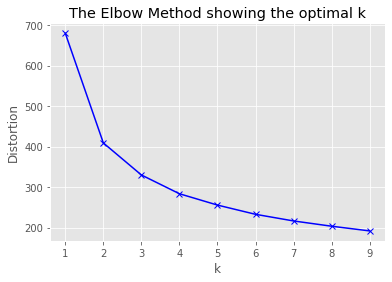

The best k-value is 2


In [59]:
from scipy.spatial.distance import cdist

distortions = []
K = range(1,10)
for k in K:
  kmeans = KMeans(n_clusters=k).fit(normalize)
  #distortions.append(sum(np.min(cdist(normalize, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / normalize.shape[0])
  distortions.append(kmeans.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

print('The best k-value is 2')

##sourced code from https://pythonprogramminglanguage.com/kmeans-elbow-method/

### Question 10 `(1 points)`
**This question will be manually graded.**

For this question, please come up with your own question about this dataset and using a clustering technique as part of your method of answering it. Describe in short the question, and how clustering can answer that question. Feel free to use additional cells.


Double click to enter your answer.

In [30]:
np.arange(2)

array([0, 1])

In [38]:
q10_df

,q16a,q16ac
129451,0,3.000000
116706,0,1.000000
144394,0,3.000000
24699,0,5.000000
47453,4,4.875000
...,...,...
88825,0,4.666667
170154,0,2.000000
88687,3,3.875000
107905,4,3.888889


In [52]:
q10_df = df[['q16a', 'q16ac']].dropna()
kmeans = KMeans(n_clusters = 8, random_state = 42)
kmeans.fit(q10_df)
silhouette_score(q10_df, kmeans.labels_)
## having 8 clusters has highest silhouette score

0.6053689354561449

In [55]:
q10_df['clusters'] = kmeans.labels_
q10_df[(q10_df['q16a'] > np.mean(q10_df['q16a'])) & (q10_df['q16ac'] > np.mean(q10_df['q16ac']))].groupby('clusters').size()
## biggest cluster is cluster 4

clusters
4    6384
6    2107
7     817
dtype: int64

In [64]:
## Is there a relationship between number of years a reviewer has been active and average star rating?
## Are there any clusters with high number of years a reviewer has been active and high average star rating?
## What is the best number of clusters to use for this problem based on the silhouette metric?
## After finding the optimal k-value, see if any of the clusters represent high number of years a reviewer has been active and high average star ratings.

q10_df = df[['q16a', 'q16ac']].dropna()
q10_df_start = df[['q16a', 'q16ac']].dropna()
kmeans_start = KMeans(n_clusters = 2, random_state = 42)
kmeans_start.fit(q10_df_start)
best_score = silhouette_score(q10_df_start, kmeans_start.labels_)
#start = 0
#start_k_value = 2
best_k_value = 2
for i in np.arange(2,9):
  kmeans = KMeans(n_clusters = i, random_state = 42)
  kmeans.fit(q10_df)
  new_score = silhouette_score(q10_df, kmeans.labels_)
  if new_score > best_score:
    best_score = new_score
    best_k_value = i
#best_k_value
#best_score
kmeans = KMeans(n_clusters = best_k_value, random_state = 42)
kmeans.fit(q10_df)
count_dic = {}
counts = kmeans.labels_.tolist()
for i in np.arange(best_k_value):
  count_dic[i] = counts.count(i)
#count_dic
#kmeans.cluster_centers_
q10_df['clusters'] = kmeans.labels_
biggest_cluster = q10_df[(q10_df['q16a'] > np.mean(q10_df['q16a'])) & (q10_df['q16ac'] > np.mean(q10_df['q16ac']))].groupby('clusters').size().index[0]
center_of_biggest_cluster = kmeans.cluster_centers_[biggest_cluster]

print('k-value: ', best_k_value),
print('silhouette score: ', best_score),
print('number in each cluster: ', count_dic),
print('cluster centers: ', kmeans.cluster_centers_)
print('cluster that represents high number of active years and high average ratings: ', biggest_cluster)
print('centroid of cluster', biggest_cluster, ': ', center_of_biggest_cluster)

k-value:  8
silhouette score:  0.6053689354561449
number in each cluster:  {0: 2154, 1: 8411, 2: 13382, 3: 6446, 4: 7149, 5: 9858, 6: 2787, 7: 1305}
cluster centers:  [[2.34800550e+00 2.67284239e+00]
 [1.94388301e-01 2.61851106e+00]
 [3.47499807e-14 4.93164776e+00]
 [5.24356190e-02 1.02751079e+00]
 [1.32126316e+00 4.25261101e+00]
 [3.37507799e-14 3.87865171e+00]
 [3.42528736e+00 4.03814790e+00]
 [5.67432950e+00 3.74718389e+00]]
cluster that represents high number of active years and high average ratings:  4
centroid of cluster 4 :  [1.32126316 4.25261101]


## Bonus question (`2 Points`) - Reviewer overlap:
- Download last week's dataset
- Aggregate cool, funny and useful votes for each business id
- You may transform the aggregations (take %, log, or leave it as it is)
- Cluster this dataframe (you can choose k). Do you find any meaningful/interesting clusters?
- Assign the cluster label to each business id
- Merge this with users to show what clusters the reviewers have reviewed. (You may need to use the pivot function) 

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()